In [41]:
# Exemplo de análise do período de amostragem para sistemas subamortecidos

In [42]:
import numpy as np
import control                   
import math
import cmath
import matplotlib.pyplot as plt

In [43]:
T = 0.5;
K = 2;
Gp = control.tf(1,[1, 1]);
Gpz = control.c2d(Gp, T);

# controlador integral
Gdz = control.tf([K, 0],[1, -1],T);

FTMF = control.feedback(Gdz*Gpz,1);
polos = control.pole(FTMF);
z = polos[0];
modulo = np.abs(z);
angulo = np.angle(z);
TzetaWn = -np.log(modulo);
fator = TzetaWn/angulo;
zeta = np.sqrt(fator**2/(1+fator**2));
wn = TzetaWn/T/zeta;
Mp = np.exp(-np.pi*zeta/np.sqrt(1-zeta**2));
print("Mp = \n",Mp)
Ts5 = 3/(zeta*wn);
print("Ts5% = \n",Ts5);

# relação Wa/Wd
wa_wd = 2*np.pi/angulo;
print("wa/wd = \n",wa_wd)

Mp = 
 0.4618526210112586
Ts5% = 
 6.000000000000001
wa/wd = 
 6.180075527460298


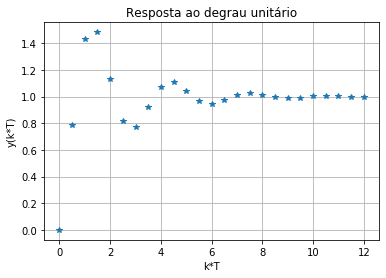

In [44]:
tfinal = 12;
Kmax = int(tfinal/T+1);
t = np.linspace(0, tfinal, Kmax)                        
x, y = control.step_response(FTMF, t);
plt.figure()
plt.plot(x, y,'*')
plt.title("Resposta ao degrau unitário")
plt.xlabel("k*T")
plt.ylabel("y(k*T)")
plt.grid(True)
plt.show()

In [45]:
# Sobressinal percentual
Mp = (max(y)-y[-1])/(y[-1]-y[0])*100;
print("Mp (%) = \n",Mp)

Mp (%) = 
 48.66882701499708


In [46]:
# Tempo de acomodação para 5%

j = Kmax-1;
delta = 0;
while (delta < 0.05):
    delta = abs((y[j]-y[-1])/y[-1]);
    ts = t[j];
    j = j-1;
    
print("ts = \n",ts)

ts = 
 4.5


In [47]:
# comparar valores do gráfico, com valores calculados
# se a escolha do periodo de amostragem for boa, os valores serão próximos